In [4]:
import json

with open("results.json", "r", encoding="utf-8") as f:
    results = json.load(f)

In [10]:
import pandas as pd

columns = ["lat", "lon", "country", "state", "elevation"]
df = pd.DataFrame(results)[columns]

In [12]:
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

4.809701919555664 MB


In [14]:
df.head()

,lat,lon,country,state,elevation
0,2.000417,-80.000417,NA,NA,0.0
1,2.000417,-78.333750,Colombia,Nariño,24.0
2,2.000417,-76.667083,Colombia,Cauca,3211.0
3,2.000417,-75.000417,Colombia,Caquetá,286.0
4,1.999583,-78.433750,Colombia,Nariño,40.0


In [13]:
df["country"].unique()

array(['NA', 'Colombia', 'Ecuador', 'Perú'], dtype=object)

In [18]:
df["state"].unique()

array(['NA', 'Nariño', 'Cauca', 'Caquetá', 'Huila', 'Putumayo',
       'Esmeraldas', 'Carchi', 'Imbabura', 'Sucumbíos', 'Manabí', 'Napo',
       'Santo Domingo de los Tsáchilas', 'Loreto', 'Orellana', 'Cotopaxi',
       'Los Ríos', 'Guayas', 'Tungurahua', 'Pastaza', 'Bolívar',
       'Chimborazo', 'Morona Santiago', 'Santa Elena', 'Cañar', 'Azuay',
       'Amazonas', 'El Oro', 'Zamora Chinchipe', 'Loja', 'Tumbes',
       'Piura', 'Cajamarca'], dtype=object)

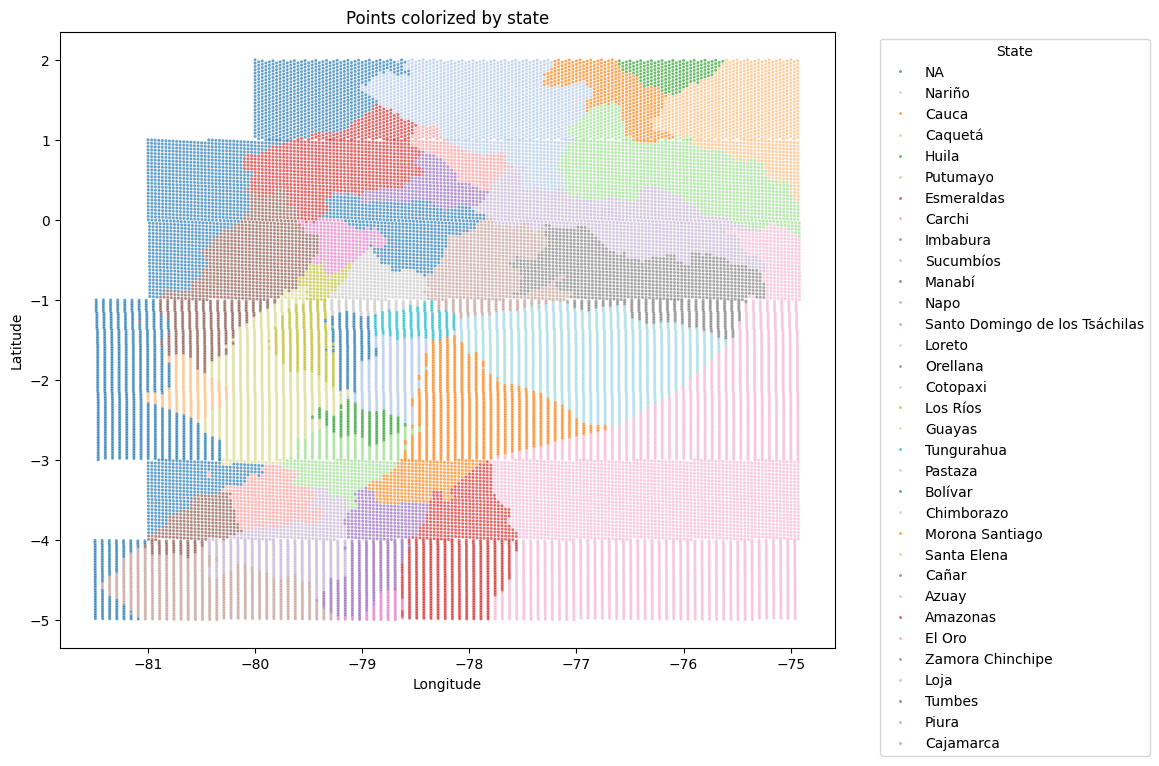

In [29]:
x = df["lon"].values
y = df["lat"].values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=x, y=y, hue=df["state"], palette="tab20", s=5, alpha=0.7, legend="full"
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Points colorized by state")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="State")
plt.show()

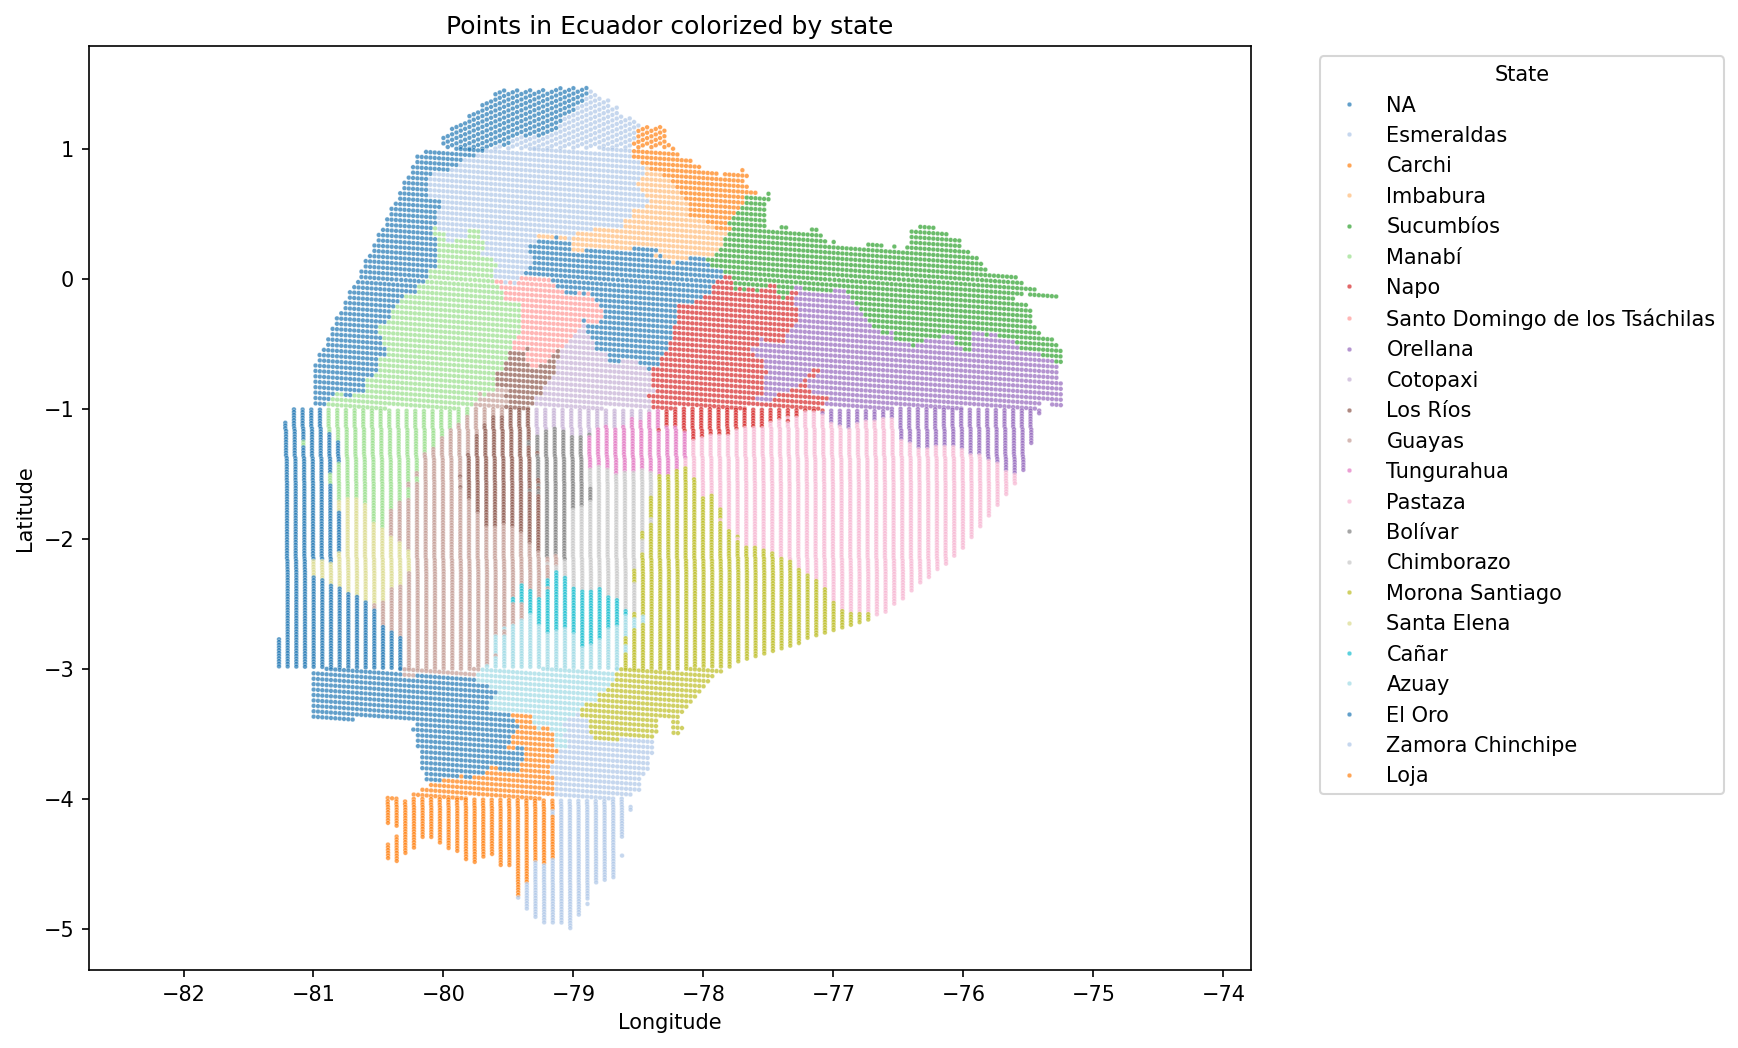

In [35]:
plt.figure(figsize=(10, 8), dpi=150)
df_ecuador = df[df["country"] == "Ecuador"]
sns.scatterplot(
    x=df_ecuador["lon"].values,
    y=df_ecuador["lat"].values,
    hue=df_ecuador["state"],
    palette="tab20",
    s=5,
    alpha=0.7,
    legend="full",
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Points in Ecuador colorized by state")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="State")
plt.axis("equal")
plt.show()

Number of NA states in Ecuador: 2373


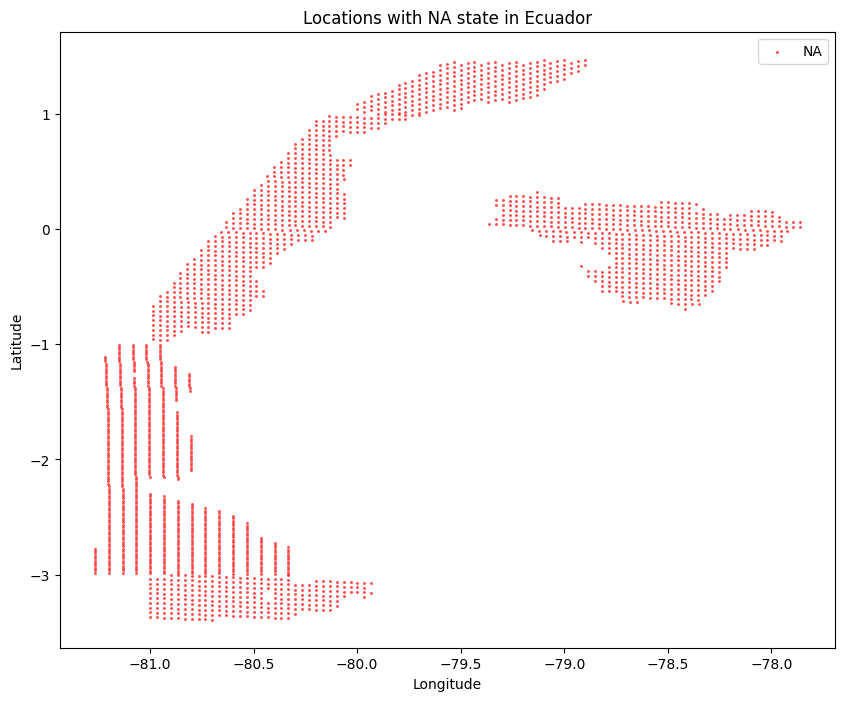

In [31]:
# Count the number of rows in df_ecuador where 'state' is 'NA'
na_count = (df_ecuador["state"] == "NA").sum()
print(f"Number of NA states in Ecuador: {na_count}")

# Plot the NA locations in Ecuador
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_ecuador[df_ecuador["state"] == "NA"]["lon"],
    y=df_ecuador[df_ecuador["state"] == "NA"]["lat"],
    color="red",
    s=5,
    alpha=0.7,
    label="NA",
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Locations with NA state in Ecuador")
plt.legend()
plt.show()

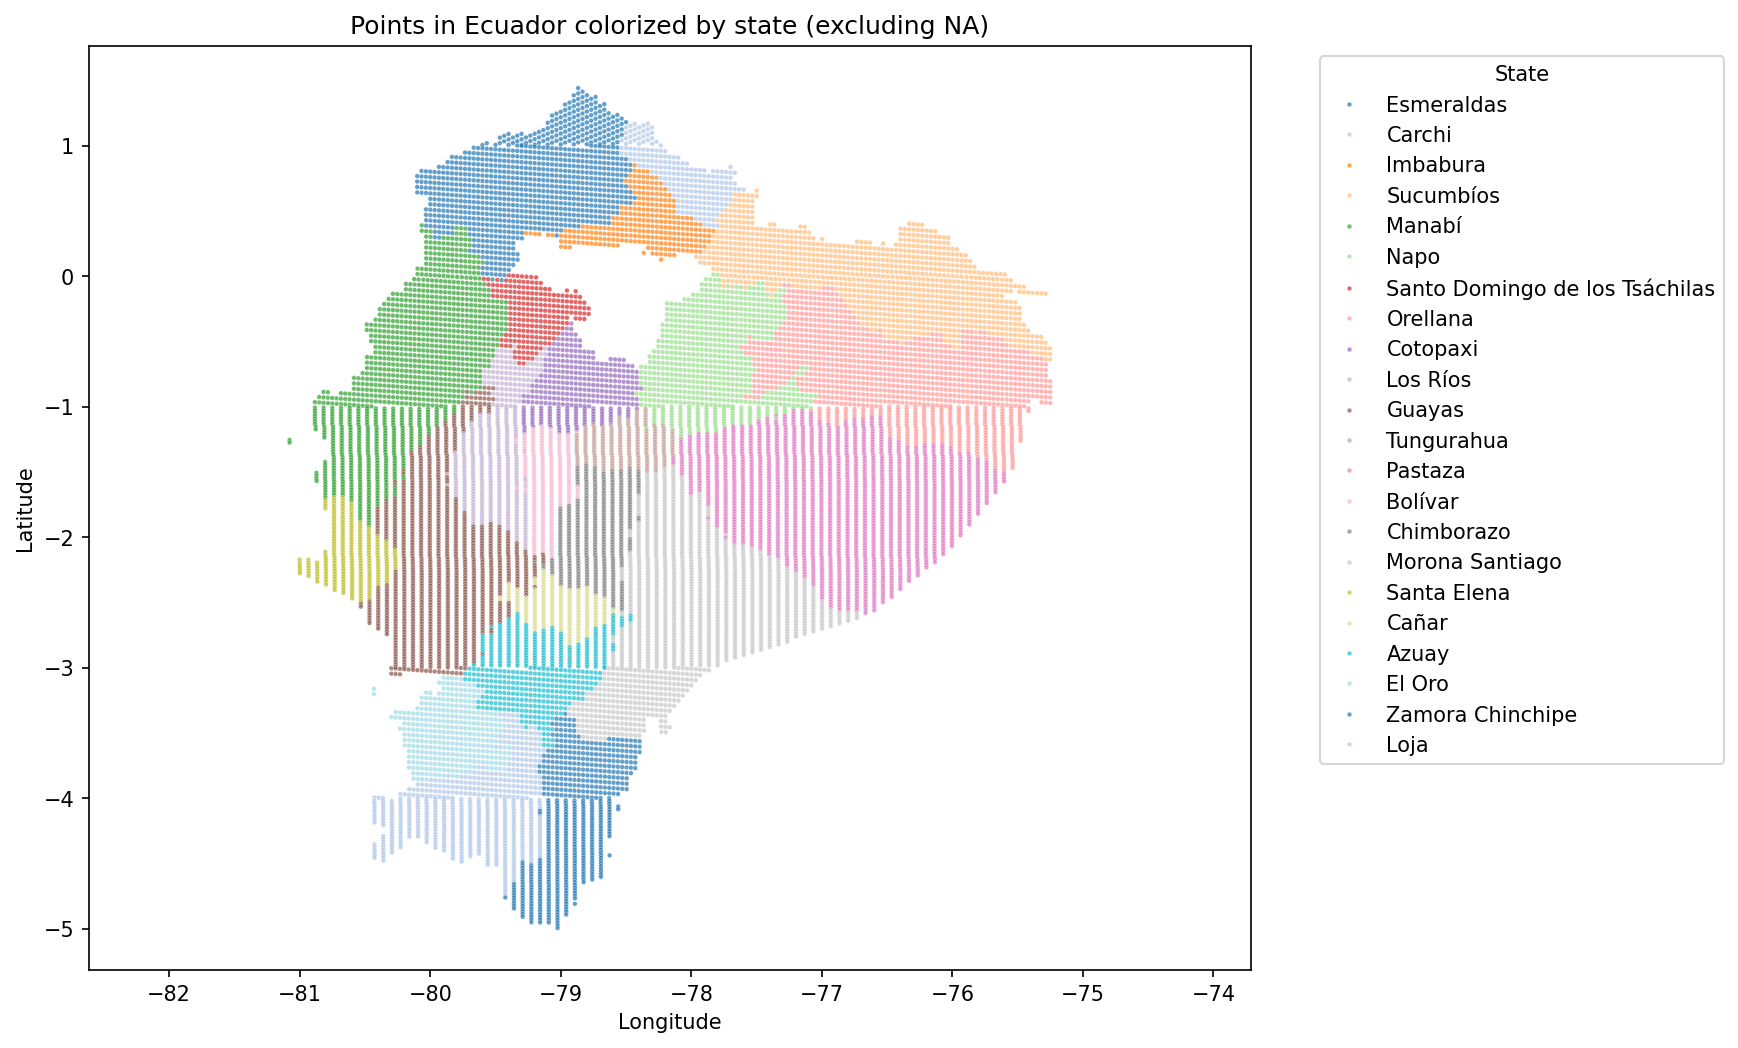

In [36]:
plt.figure(figsize=(10, 8), dpi=150)
df_ecuador_no_na = df_ecuador[df_ecuador["state"] != "NA"]
sns.scatterplot(
    x=df_ecuador_no_na["lon"].values,
    y=df_ecuador_no_na["lat"].values,
    hue=df_ecuador_no_na["state"],
    palette="tab20",
    s=5,
    alpha=0.7,
    legend="full",
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Points in Ecuador colorized by state (excluding NA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="State")
plt.axis("equal")
plt.show()

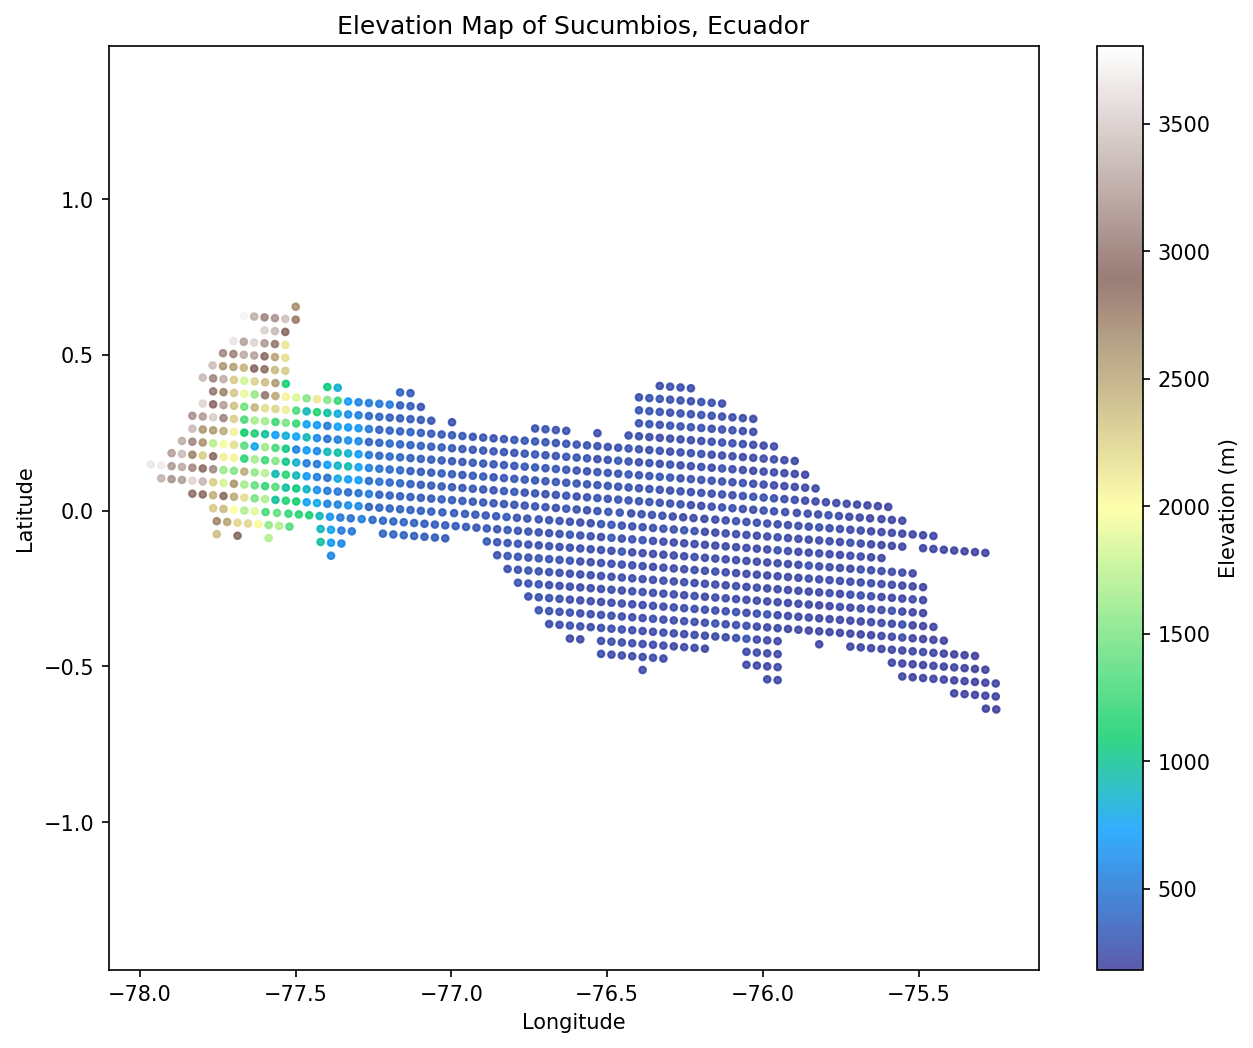

In [39]:
# Filter for Sucumbios province in Ecuador
df_sucumbios = df_ecuador_no_na[df_ecuador_no_na["state"] == "Sucumbíos"]

plt.figure(figsize=(10, 8), dpi=150)
scatter = plt.scatter(
    df_sucumbios["lon"],
    df_sucumbios["lat"],
    c=df_sucumbios["elevation"],
    cmap="terrain",
    s=10,
    alpha=0.8,
)
plt.colorbar(scatter, label="Elevation (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Elevation Map of Sucumbios, Ecuador")
plt.axis("equal")
plt.show()